In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.listdir()

['.config', 'student performance.csv', 'sample_data']

In [7]:
df = pd.read_csv("student performance.csv")

In [8]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [10]:
df.shape

(25000, 16)

In [12]:
df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [16]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [17]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,0
attendance_percentage,0
internet_access,0
travel_time,0
extra_activities,0


In [19]:
(df.isnull().mean() * 100).round(2)

,0
student_id,0.0
age,0.0
gender,0.0
school_type,0.0
parent_education,0.0
study_hours,0.0
attendance_percentage,0.0
internet_access,0.0
travel_time,0.0
extra_activities,0.0


In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numerical columns: ['student_id', 'age', 'study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score']
Categorical columns: ['gender', 'school_type', 'parent_education', 'internet_access', 'travel_time', 'extra_activities', 'study_method', 'final_grade']


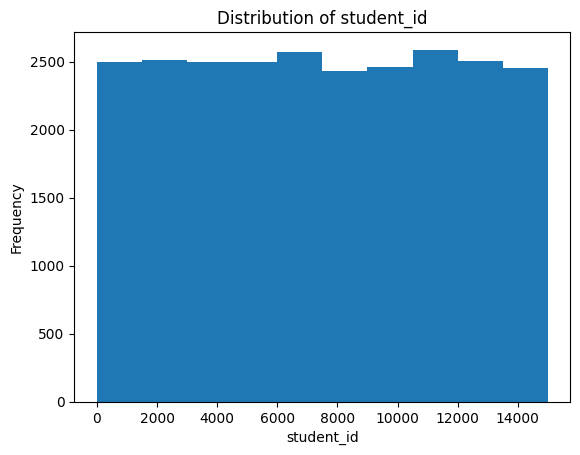

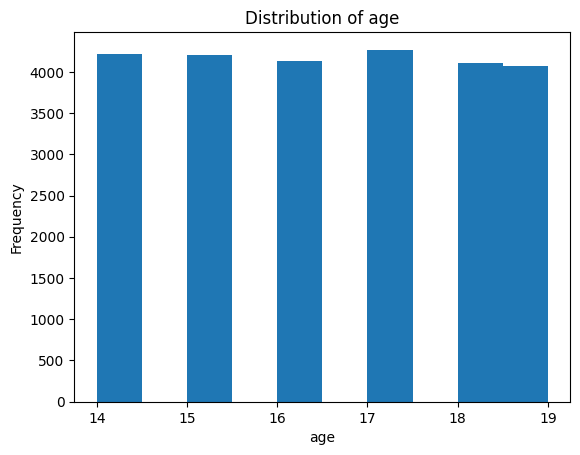

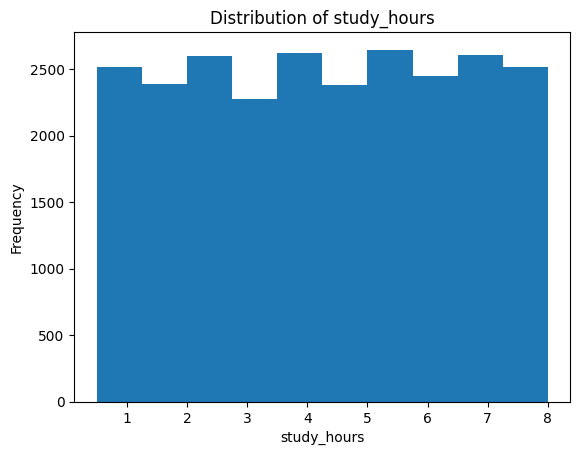

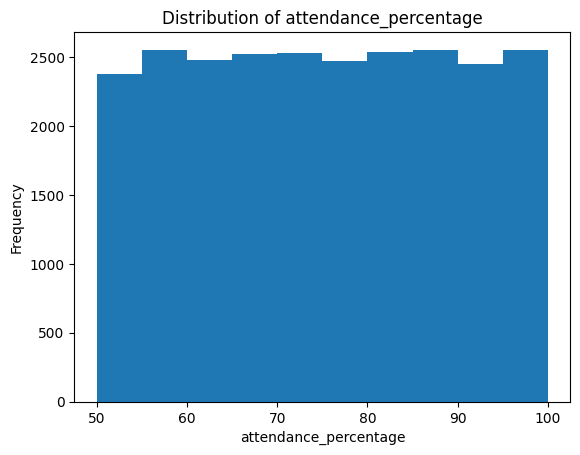

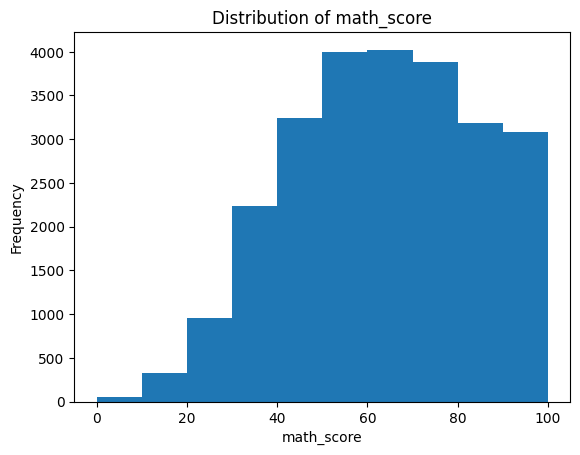

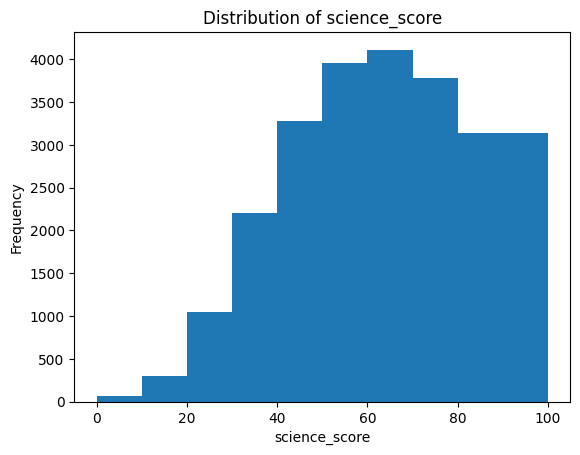

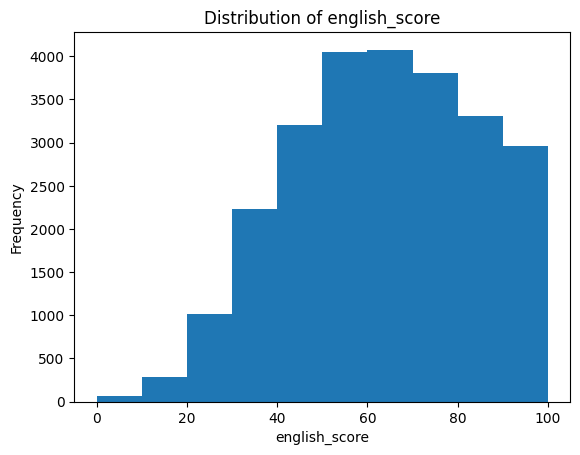

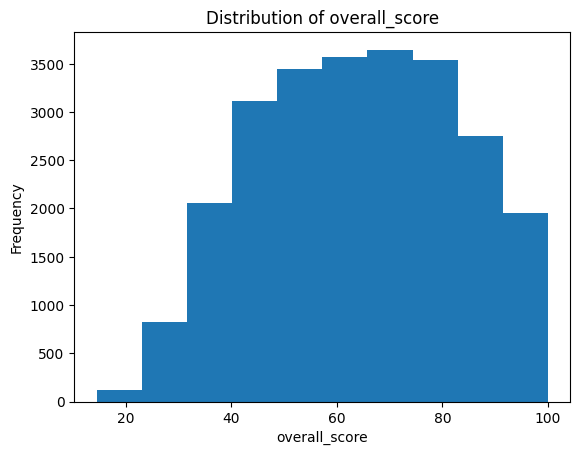

In [23]:
for col in num_cols:
    plt.figure()
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

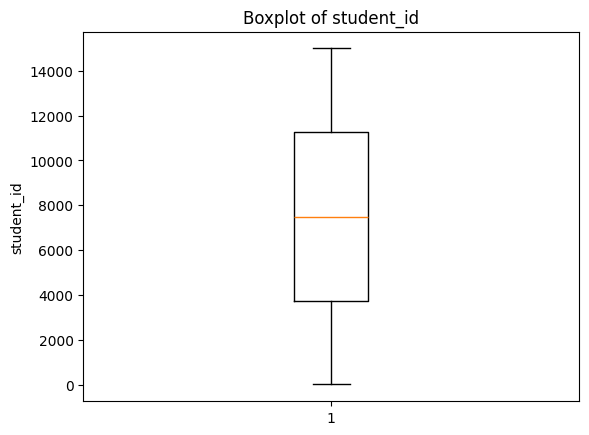

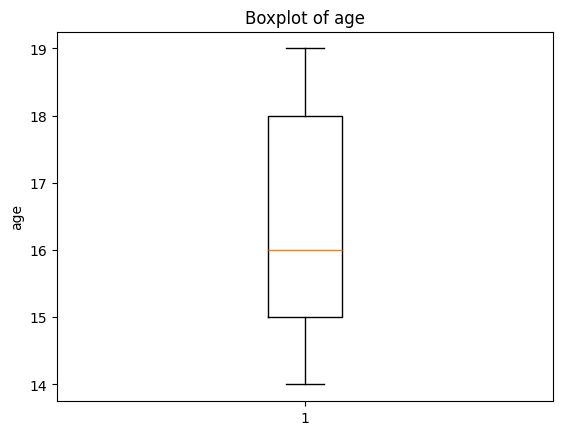

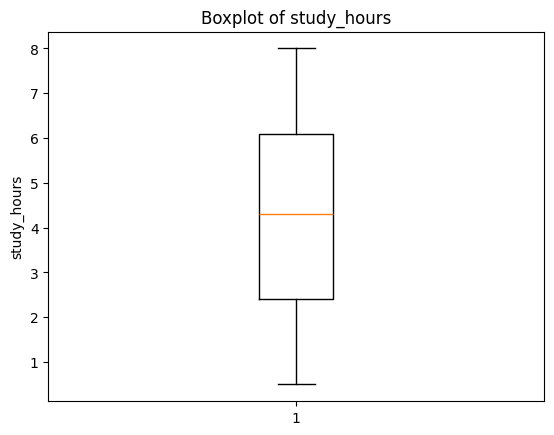

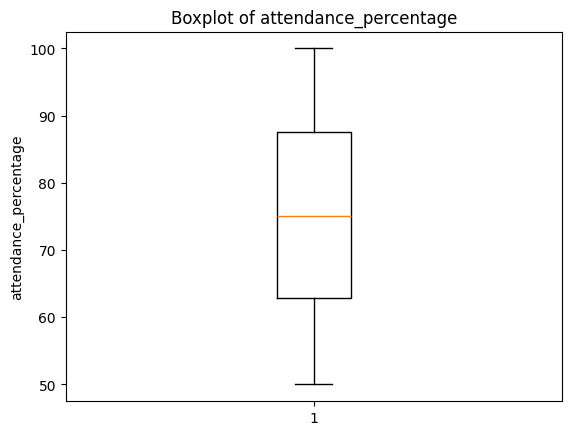

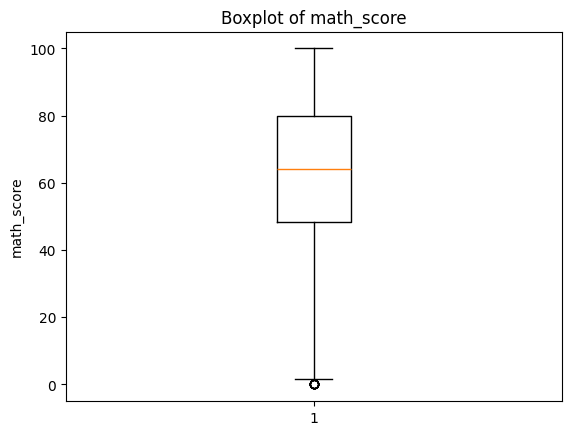

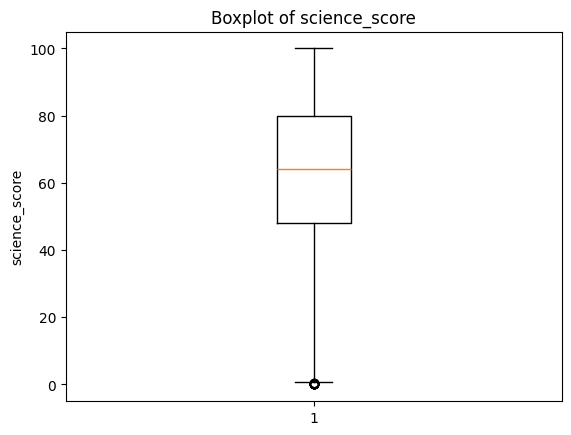

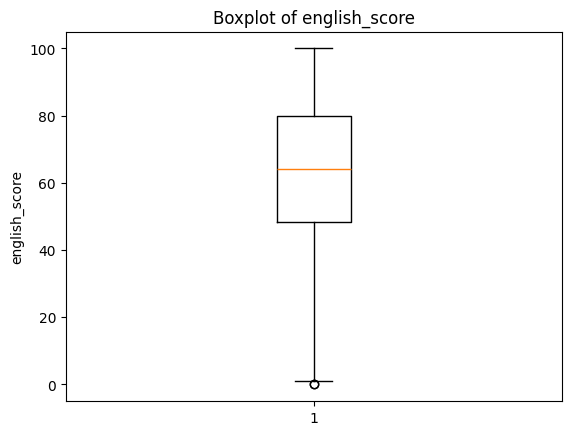

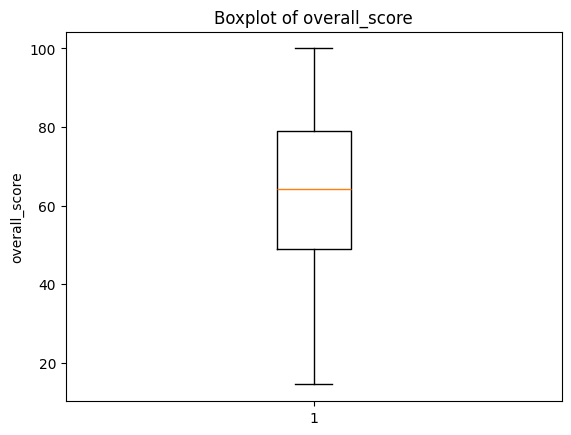

In [25]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

In [29]:
outlier_count = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_count[col] = outliers.shape[0]

outlier_count

{'student_id': 0,
 'age': 0,
 'study_hours': 0,
 'attendance_percentage': 0,
 'math_score': 10,
 'science_score': 12,
 'english_score': 2,
 'overall_score': 0}

In [31]:
col = 'math_score'   # change ONLY if your column name is different

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[f'{col}_outlier'] = (df[col] < lower) | (df[col] > upper)

df[[col, f'{col}_outlier']].head()

,math_score,math_score_outlier
0,42.7,False
1,57.6,False
2,84.8,False
3,44.4,False
4,8.9,False


In [33]:
# Use the same column as in Cell 12
# 'col' is your numeric column, e.g., 'math_score'
df[f'{col}_capped'] = np.where(
    df[col] > upper, upper,         # cap values above upper bound
    np.where(df[col] < lower, lower, df[col])  # cap values below lower bound
)

# Check first 5 rows to confirm
df[[col, f'{col}_outlier', f'{col}_capped']].head()

,math_score,math_score_outlier,math_score_capped
0,42.7,False,42.7
1,57.6,False,57.6
2,84.8,False,84.8
3,44.4,False,44.4
4,8.9,False,8.9


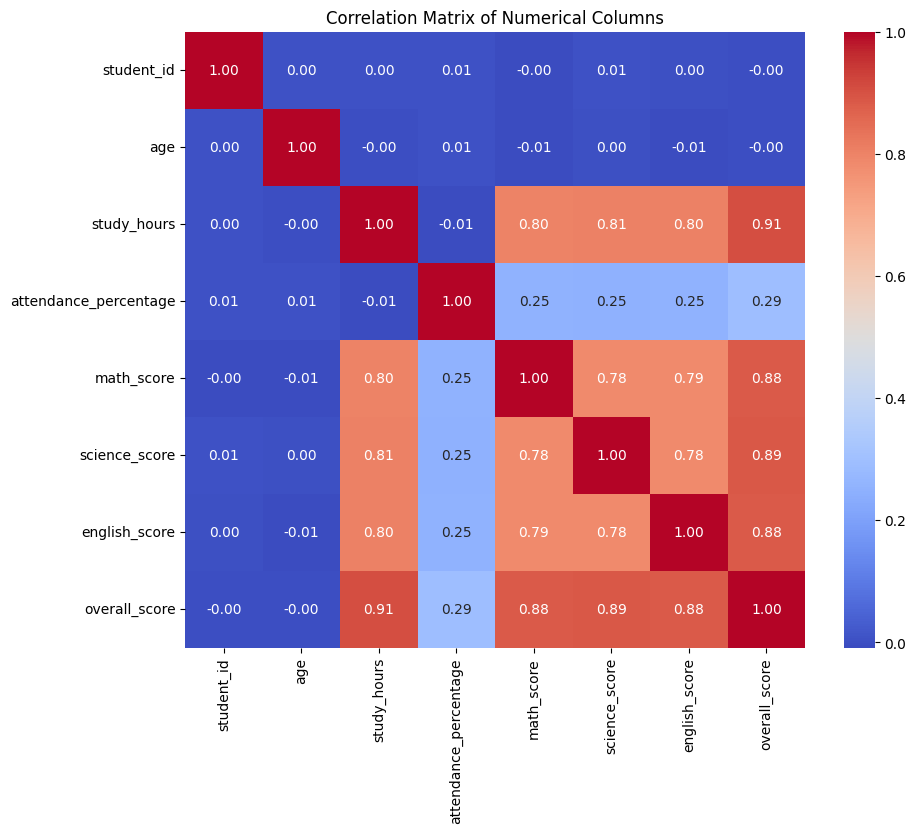

In [35]:
plt.figure(figsize=(10, 8))

# Only use numeric columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [36]:
df.to_csv("cleaned_dataset.csv", index=False)